In [ ]:
#importing libraries

# Import libraries here
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df

### Top 5 Values

In [89]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [91]:
#explore the data
print("df shape:", df.shape)

df shape: (10000, 14)


In [92]:
missing_values = df.isna().sum()
missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [93]:
# Accessing data types of DataFrame columns
column_data_types = df.dtypes
column_data_types

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [94]:
# Check for duplicate rows in a DataFrame
duplicate_rows = df[df.duplicated()].count()
duplicate_rows

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [95]:
# Get summary statistics of numeric columns in the DataFrame
summary_stats = df.describe(include='all')
summary_stats.T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


## Data Cleaning

In [96]:
# Convert all columns to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [97]:
# Renaming DataFrame columns for Improved Clarity
df.rename(columns = {'rownumber' : 'row_number',
                      'customerid' : 'customer_id',
                      'creditscore' : 'credit_score',
                      'numofproducts': 'num_of_products',
                      'hascrcard': 'has_credit_card',
                      'isactivemember' : 'is_active_member',
                      'estimatedsalary': 'estimated_salary'}, inplace = True)

In [98]:
df.head(2)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [99]:
# Dropping Unnecessary Columns for Improved Prediction
df = df.drop(columns = ["row_number", "customer_id"])

## Exploratory Data Analysis

 "Exited" with a value of 0 often represents customers who have not churned (i.e., they are still active or have not left), while "Exited" with a value of 1 represents customers who have churned (i.e., they have left or discontinued their relationship with the company).

#### 1. Target Distrubution

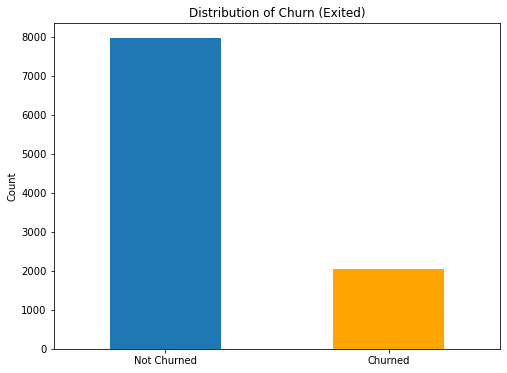

In [136]:
# Count the occurrences of each class in the "exited" column
exited_counts = df['exited'].value_counts()


# Create labels for the x-axis
exited_labels = ['Not Churned', 'Churned']

# Plot the distribution
plt.figure(figsize=(8, 6))
exited_counts.plot(kind='bar', color=['#1f77b4', 'orange'])

# Add title
plt.title('Distribution of Churn (Exited)')

# Label axes
plt.ylabel('Count')

# Customize the x-axis tick labels
plt.xticks(range(len(exited_labels)), exited_labels, rotation=0)

# Show the plot
plt.show()

#### 2. Age Distribution: Plotting the distribution of ages for customers who exited and those who didn't

In [133]:
df.age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

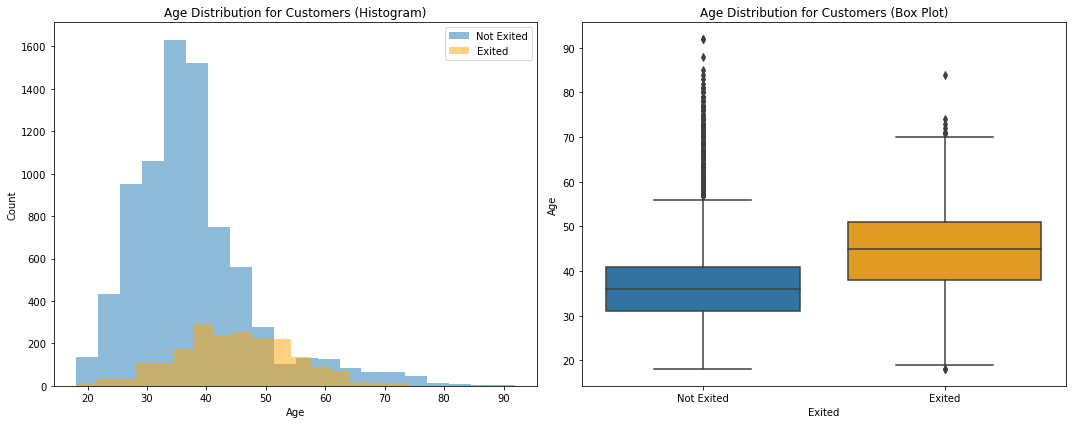

In [139]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the histogram on the left subplot
axes[0].hist(df[df['exited'] == 0]['age'], bins=20, alpha=0.5, label='Not Exited', color='#1f77b4')
axes[0].hist(df[df['exited'] == 1]['age'], bins=20, alpha=0.5, label='Exited', color='orange')
axes[0].set_title('Age Distribution for Customers (Histogram)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].legend()

# Plot the box plots on the right subplot
sns.boxplot(x='exited', y='age', data=df, palette=['#1f77b4', 'orange'], ax=axes[1])
axes[1].set_title('Age Distribution for Customers (Box Plot)')
axes[1].set_xlabel('Exited')
axes[1].set_ylabel('Age')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Not Exited', 'Exited'])

plt.tight_layout()
plt.show()

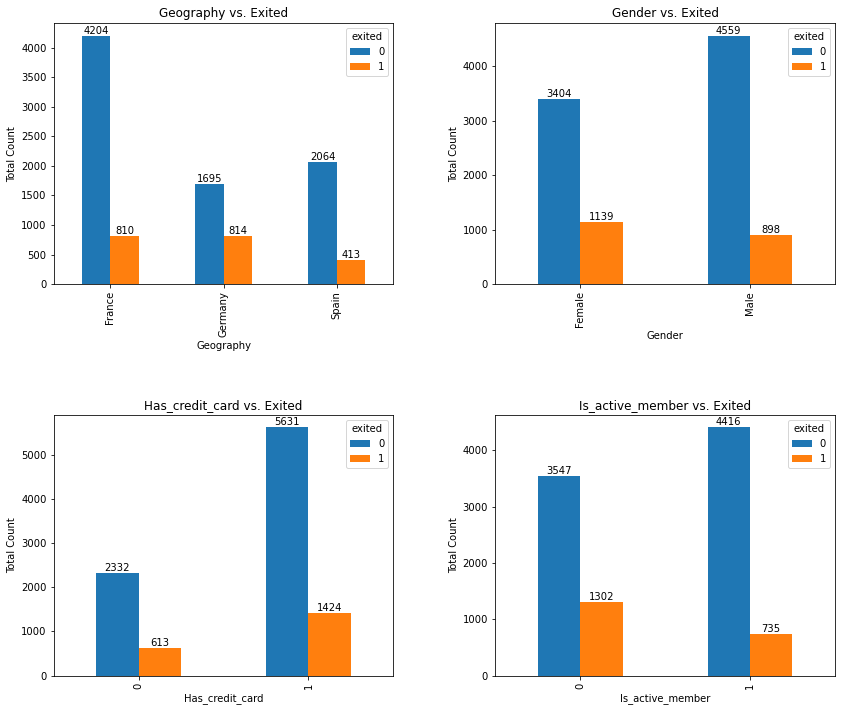

In [186]:
# List of categorical columns
categorical_columns = ["geography", "gender", "has_credit_card", "is_active_member"]

# Creating subplots in a 2x2 grid with increased spacing
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing here

# Creating individual bar charts for categorical columns
for i, col in enumerate(categorical_columns):

    # Group the data by the categorical column and "exited" column and get the counts
    data_grouped = df.groupby([col, 'exited']).size().unstack()

    # Creating a bar chart for the current categorical column
    ax = data_grouped.plot(kind='bar', ax=axes[i // 2, i % 2])

    # Set the title, x-axis label, and y-axis label
    ax.set_title(f"{col.capitalize()} vs. Exited")
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel("Total Count")

    # Annotate with values at the top of each bar
    for p in ax.patches:
        if not np.isnan(p.get_height()):  # Check for NaN values
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom')

# Show the plots
plt.show()

#### 4. Balance vs. Churn: Analyzing how the account balance relates to churn

In [161]:
# Define the bin edges
bin_edges = [-1, 50000, 100000, 150000, 200000, 250000, 300000]
b_edges = ['0-50000', '50001-100000', '100001-150000', '150001-200000', '200001-250000', '250000+']


# Create a new column in the DataFrame that represents the balance bins
df['balance_range'] = pd.cut(df['balance'], bins=bin_edges, labels=b_edges)

# Display the first few rows of the DataFrame to check the new column
print(df[['balance', 'balance_range']].head(3))


     balance  balance_range
0       0.00        0-50000
1   83807.86   50001-100000
2  159660.80  150001-200000


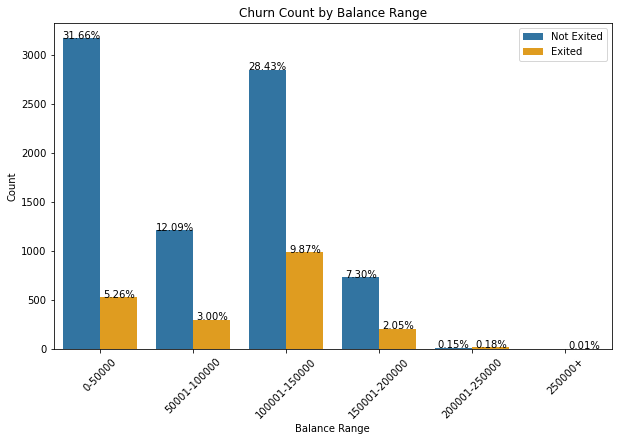

In [175]:

# Create a bar plot
plt.figure(figsize=(10, 6))

# Plot the distribution
ax = sns.countplot(data=df, x='balance_range', hue='exited', palette=['#1f77b4', 'orange'])

# Add title
plt.title('Churn Count by Balance Range')

# Label axes
plt.xlabel('Balance Range')
plt.ylabel('Count')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add percentage labels
total = len(df['balance_range'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.legend(labels=['Not Exited', 'Exited'], loc='upper right')

# Show the plot
plt.show()



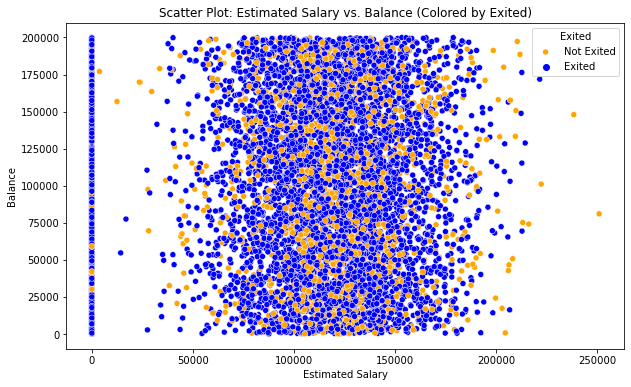

In [170]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='estimated_salary', x='balance', hue='exited', palette={0: 'blue', 1: 'orange'})
plt.title('Scatter Plot: Estimated Salary vs. Balance (Colored by Exited)')
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.legend(title='Exited', loc='upper right', labels=['Not Exited', 'Exited'])
plt.show()

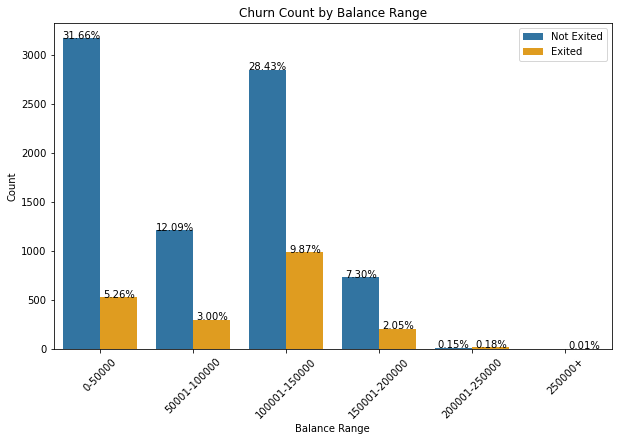

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))

# Plot the distribution
ax = sns.countplot(data=df, x='balance_range', hue='exited', palette=['#1f77b4', 'orange'])

# Add title
plt.title('Churn Count by Balance Range')

# Label axes
plt.xlabel('Balance Range')
plt.ylabel('Count')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add percentage labels
total = len(df['balance_range'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.legend(labels=['Not Exited', 'Exited'], loc='upper right')

# Show the plot
plt.show()
